In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import PIL
import matplotlib.pyplot as plt
from keras import layers,Sequential
import pathlib

In [ ]:
!git clone https://github.com/Sabari231024/PlantVillage.git

Cloning into 'PlantVillage'...
remote: Enumerating objects: 20643, done.
remote: Total 20643 (delta 0), reused 0 (delta 0), pack-reused 20643
Receiving objects: 100% (20643/20643), 323.46 MiB | 22.50 MiB/s, done.
Updating files: 100% (20640/20640), done.


In [ ]:
data_dir='/content/PlantVillage'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [ ]:
print(len(list(data_dir.glob('Tomato_healthy/*'))))

1591


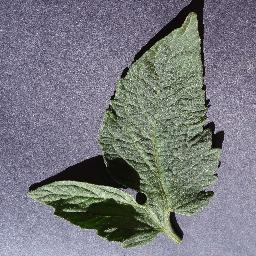

In [ ]:
th= list(data_dir.glob('Tomato_healthy/*'))
PIL.Image.open(str(th[1]))

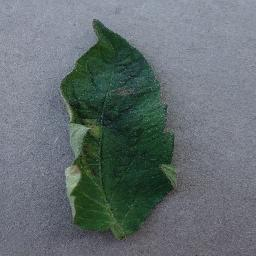

In [ ]:
th1= list(data_dir.glob('Tomato_Leaf_Mold/*'))
PIL.Image.open(str(th1[2]))

In [ ]:
#parameters
batch_size = 30
imgH = 180
imgW = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset ='training',seed=123,image_size=(imgH,imgW),batch_size=batch_size)

Found 20638 files belonging to 15 classes.
Using 16511 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset='validation',seed=123,image_size=(imgH,imgW),batch_size=batch_size)

Found 20638 files belonging to 15 classes.
Using 4127 files for validation.


In [ ]:
print(train_ds.class_names)
class_names=train_ds.class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


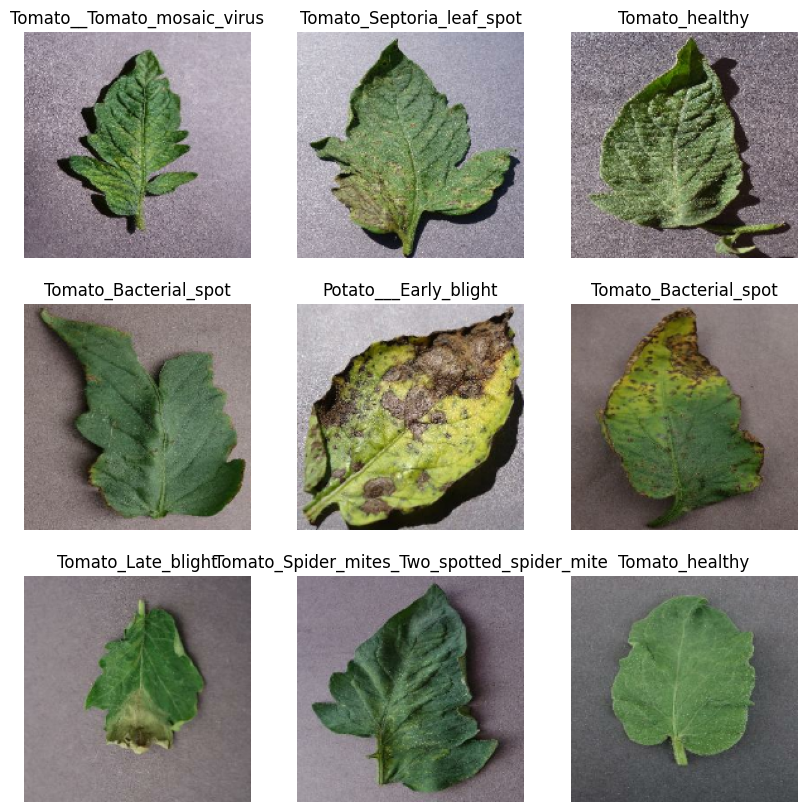

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 180, 180, 3)
(30,)


In [ ]:
normalization_layer = layers.Rescaling(1./255,input_shape=(imgH,imgW,3))

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch , labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 0.9264886


In [ ]:
num_classes = len(class_names)
model = Sequential([normalization_layer,
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(256,activation=tf.keras.layers.LeakyReLU()),
                    layers.Dense(num_classes)])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
mdl = model.fit(train_ds,validation_data=val_ds,
                epochs=epochs)

Epoch 1/10
551/551 [==============================] - 29s 42ms/step - loss: 1.1610 - accuracy: 0.6262 - val_loss: 0.6352 - val_accuracy: 0.7892
Epoch 2/10
551/551 [==============================] - 21s 38ms/step - loss: 0.4513 - accuracy: 0.8490 - val_loss: 0.4210 - val_accuracy: 0.8607
Epoch 3/10
551/551 [==============================] - 21s 38ms/step - loss: 0.2774 - accuracy: 0.9052 - val_loss: 0.3419 - val_accuracy: 0.8893
Epoch 4/10
551/551 [==============================] - 21s 37ms/step - loss: 0.1788 - accuracy: 0.9399 - val_loss: 0.2680 - val_accuracy: 0.9196
Epoch 5/10
551/551 [==============================] - 20s 36ms/step - loss: 0.1329 - accuracy: 0.9529 - val_loss: 0.2940 - val_accuracy: 0.9225
Epoch 6/10
551/551 [==============================] - 21s 38ms/step - loss: 0.1085 - accuracy: 0.9639 - val_loss: 0.3120 - val_accuracy: 0.9118
Epoch 7/10
551/551 [==============================] - 20s 37ms/step - loss: 0.0844 - accuracy: 0.9710 - val_loss: 0.3762 - val_accuracy:

In [ ]:
#1)Leakyrelu 2)relu(overfitting happens)

Text(0.5, 1.0, 'LOSS GRAPH')

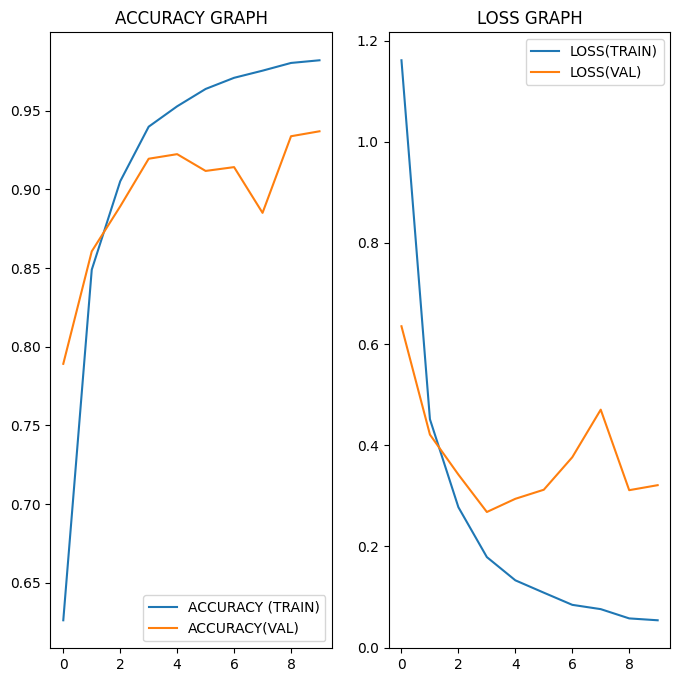

In [ ]:
acc =mdl.history['accuracy']
val_acc =mdl.history['val_accuracy']
loss = mdl.history['loss']
val_loss = mdl.history['val_loss']
epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='ACCURACY (TRAIN)')
plt.plot(epochs_range,val_acc,label='ACCURACY(VAL)')
plt.legend()
plt.title('ACCURACY GRAPH')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='LOSS(TRAIN)')
plt.plot(epochs_range,val_loss,label='LOSS(VAL)')
plt.legend()
plt.title('LOSS GRAPH')


In [ ]:
img_path = '/content/PlantVillage/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG'
img = tf.keras.utils.load_img(img_path, target_size=(imgH,imgW))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(str(class_names[np.argmax(score)]+':'+str(100*np.max(score))))

1/1 [==============================] - 0s 18ms/step
Potato___Late_blight:99.99998807907104
